In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [5]:
# Note to self for later: http://stackoverflow.com/a/17001474

In [6]:
# Data from https://www.census.gov/econ/currentdata/datasets/
data_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data')
data_df.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val
0,1,1,5,0,1,0,17200.0
1,1,1,2,0,1,0,9.0
2,1,1,3,0,1,0,11.0
3,1,1,4,0,1,0,22.0
4,1,1,1,0,1,0,42.0


In [7]:
categories_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='categories')
data_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='data_types')
error_types_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='error_types')
geo_levels_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='geo_levels')
periods_df = pd.read_excel("RESSALES-mf.xlsx", sheetname='periods')

In [8]:
categories_df.head(2)

,cat_idx,cat_code,cat_desc,cat_indent
0,1,SOLD,New Single-family Houses Sold,0
1,2,ASOLD,Annual Rate for New Single-family Houses Sold,0


In [9]:
# it auto-merges cat_idx in our original dataframe with cat_idx in categories_df
# it auto-merges dt_idx in our original dataframe with dt_idx in data_types_df
# it auto-merges geo_idx in our original dataframe with geo_idx in geo_levels_df
# it auto-merges per_idx in our original dataframe with per_idx in periods_df
df = data_df.merge(categories_df).merge(data_types_df).merge(geo_levels_df).merge(periods_df)
# We only want to look at the total number of homes sold across entire the united states
df = df[(df['cat_code'] == 'SOLD') & (df['geo_code'] == 'US') & (df['dt_code'] == 'TOTAL')]

In [10]:
# We don't merge error_types_df because all of the errors are the same
df['et_idx'].value_counts()

0    641
Name: et_idx, dtype: int64

In [11]:
df.head(2)

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,1,1,1,0,1,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,2,1,1,0,1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01


In [12]:
# Now let's remove the join columns to keep things clean
df = df.drop(['per_idx', 'cat_idx', 'dt_idx', 'et_idx', 'geo_idx'], axis=1)
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
24,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
34,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
44,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


In [13]:
# At least we can see 'per_name' (period name) is already a datetime!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 4 to 15199
Data columns (total 11 columns):
is_adj        641 non-null int64
val           641 non-null float64
cat_code      641 non-null object
cat_desc      641 non-null object
cat_indent    641 non-null int64
dt_code       641 non-null object
dt_desc       641 non-null object
dt_unit       641 non-null object
geo_code      641 non-null object
geo_desc      641 non-null object
per_name      641 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 60.1+ KB


In [ ]:
#change the index to be the datetime

In [14]:
df.head(3)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
4,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
14,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
24,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01


In [16]:
df.index = df['per_name']
df.head(3)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01


In [17]:
del df['per_name']

In [18]:
df.head(3)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


In [ ]:
# Select specific dates via the index

In [19]:
mylist = ['cat', 'dog', 'frog', 'log']

In [20]:
mylist[0]

'cat'

In [27]:
#pick everything from a given year
df['1987']['val'].sum()

672.0

In [28]:
df['1980']['val'].sum()

545.0

# Selecting slices of data

In [29]:
mylist

['cat', 'dog', 'frog', 'log']

In [30]:
mylist[:2]

['cat', 'dog']

In [31]:
mylist[2:4]

['frog', 'log']

In [33]:
df['2001':].head(10)

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
2001-01-01,0,72.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-02-01,0,85.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-03-01,0,94.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-04-01,0,84.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-05-01,0,80.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-06-01,0,79.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-07-01,0,76.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-08-01,0,74.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2001-09-01,0,66.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


In [34]:
df['1965-06':'1972-02']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1965-06-01,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-07-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-08-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-09-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-10-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-11-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1965-12-01,0,37.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1966-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1966-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


In [35]:
df[:'1990']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
per_name,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-04-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-05-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-06-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-07-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-08-01,0,56.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
1963-09-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


# Doing some things

In [36]:
df['1980':'1990']['val'].sum()

6623.0

In [37]:
df['1990':'2000']['val'].sum()

7857.0

In [41]:
df[:'1999']['val'].median()

52.0

In [42]:
df['2000':]['val'].median()

49.0

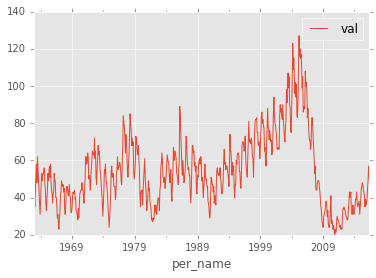

In [43]:
df.plot(y='val')

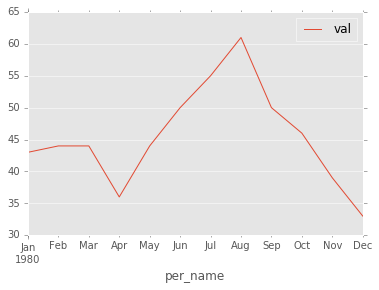

In [45]:
df['1980'].plot(y='val')

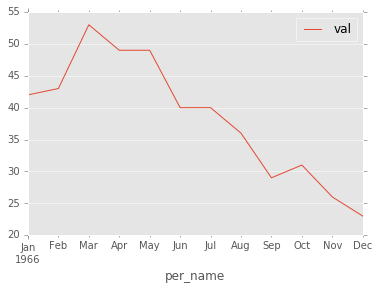

In [46]:
df['1966'].plot(y='val')

# resample

# .resample it the groupbly of time-based data

In [49]:
df.resample('A').sum()

,is_adj,val,cat_indent
per_name,,,
1963-12-31,0,560.0,0
1964-12-31,0,565.0,0
1965-12-31,0,575.0,0
1966-12-31,0,461.0,0
1967-12-31,0,488.0,0
1968-12-31,0,490.0,0
1969-12-31,0,449.0,0
1970-12-31,0,486.0,0
1971-12-31,0,657.0,0


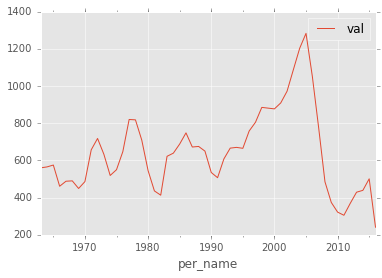

In [50]:
df.resample('A').sum().plot(y='val')

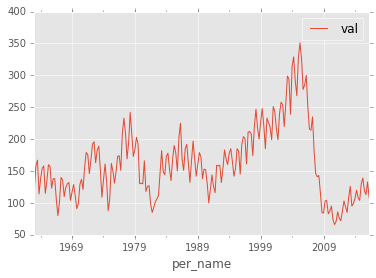

In [51]:
df.resample('Q').sum().plot(y='val')

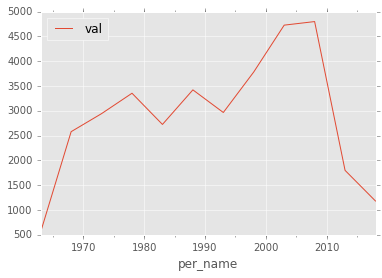

In [52]:
#Collecting into buckets of 5 years
df.resample('5A').sum().plot(y='val')

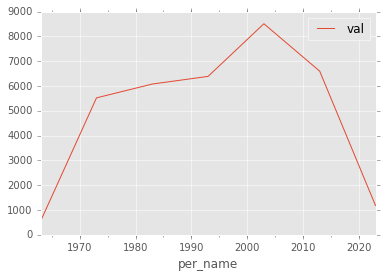

In [53]:
#Collecting into buckets of 10 years
df.resample('10A').sum().plot(y='val')

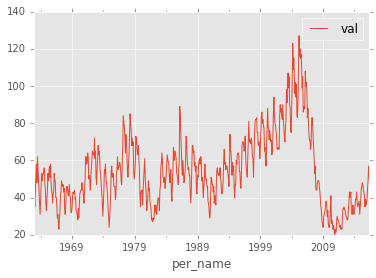

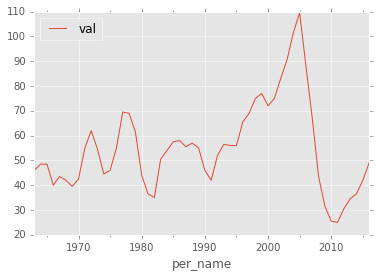

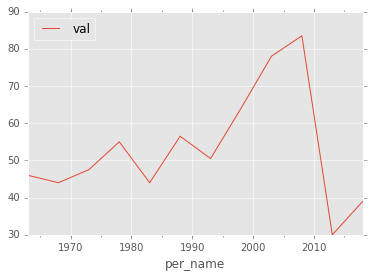

In [55]:
df.plot(y='val')
df.resample('A').median().plot(y='val')
df.resample('5A').median().plot(y='val')

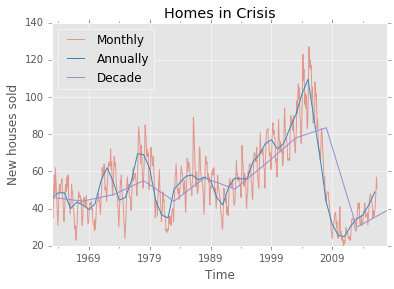

In [65]:
ax = df.plot(y='val', label='Monthly', alpha=0.5)
df.resample('A').median().plot(y='val', ax=ax, label='Annually')
df.resample('5A').median().plot(y='val', ax=ax, label='Decade')
ax.set_title("Homes in Crisis")
ax.set_xlabel("Time")
ax.set_ylabel("New houses sold")
#ax.set TAB
plt.savefig("TEST.svg")

In [59]:
df.index.name = 'Period Name'

In [66]:
import datetime
datetime.datetime(2016, 6, 7, 14, 30).month

6

In [68]:
#df['val'] / 4

In [69]:
df.index.month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10

In [71]:
#For a given month, what is the average number of houses sold
#so, we group by the month
#and then takt the median of each group
#Each of the month numbers in the index
df.groupby(by=df.index.month).median()

,is_adj,val,cat_indent
1,0,44.5,0
2,0,50.0,0
3,0,58.0,0
4,0,59.5,0
5,0,58.0,0
6,0,58.0,0
7,0,55.0,0
8,0,56.0,0
9,0,50.0,0
10,0,51.0,0


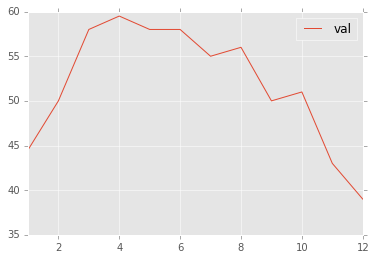

In [72]:
df.groupby(by=df.index.month).median().plot(y='val')

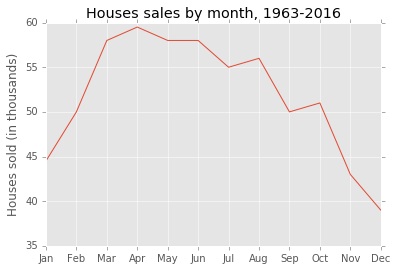

In [76]:
#improving the graph
ax = df.groupby(by=df.index.month).median().plot(y='val', legend=False)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Houses sold (in thousands)')
ax.set_title('Houses sales by month, 1963-2016')

In [79]:
#average sold per month
df.groupby(by=df.index.month).median()
#The least sold in any month (e.g. the worst January ever, the worst July ever)
df.groupby(by=df.index.month).min()
#The best sold in any month (e.g. the best January ever, the best July ever)
df.groupby(by=df.index.month).max()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc
1,0,92.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
2,0,109.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
3,0,127.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
4,0,116.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
5,0,120.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
6,0,115.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
7,0,117.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
8,0,110.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
9,0,99.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States
10,0,105.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States


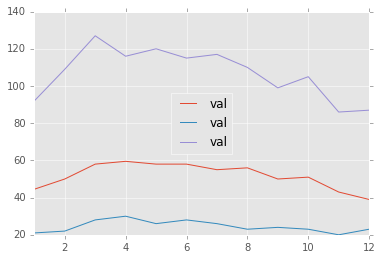

In [83]:
#average sold per month
ax = df.groupby(by=df.index.month).median().plot(y='val', Label='Average')
#The least sold in any month (e.g. the worst January ever, the worst July ever)
df.groupby(by=df.index.month).min().plot(y='val', ax=ax, Label='Least sold')
#The best sold in any month (e.g. the best January ever, the best July ever)
df.groupby(by=df.index.month).max().plot(y='val', ax=ax, Label='Most sold')

# Filling in between the lines

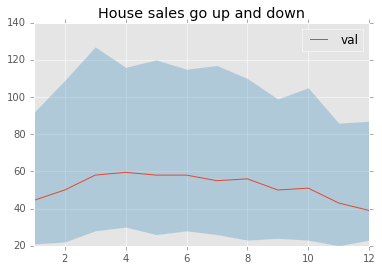

In [91]:
#Make a graph of the average
ax = df.groupby(by=df.index.month).median().plot(y='val', Label='Average')
x_values = df.groupby(by=df.index.month).median().index
#get mininum
min_values = df.groupby(by=df.index.month)['val'].min()
#get the maximum
max_values = df.groupby(by=df.index.month)['val'].max()
ax.fill_between([1,2,3,4,5,6,7,8,9,10,11,12],min_values, max_values, alpha=0.3)
ax.set_title('House sales go up and down')

In [89]:
df.groupby(by=df.index.month).median().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

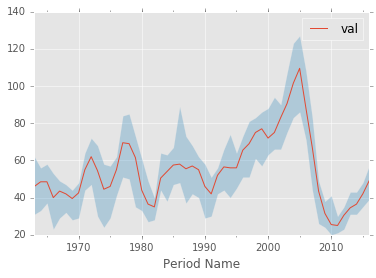

In [94]:
ax = df.resample('A').median().plot(y='val')
x_values = df.resample('A').median().index
min_values = df.resample('A')['val'].min()
max_values = df.resample('A')['val'].max()
ax.fill_between(x_values, max_values, min_values, alpha=0.3)